# NSL-KDD: Random Forest

### Library and dataset import

In [ ]:
!pip3 install tensorflow_decision_forests --upgrade
from google.colab import drive
drive.mount('/drive')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import tensorflow_decision_forests as tfdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 89 kB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 438 kB 52.0 MB/s 
     |████████████████████████████████| 1.7 MB 60.8 MB/s 
     |████████████████████████████████| 5.9 MB 43.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninsta

In [ ]:
def split(dataset, r=0.3):
  index = np.random.rand(len(dataset)) < r
  return dataset[~index], dataset[index]

In [ ]:
#column name creation
columns = np.array(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
           'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
           'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
           'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
           'dst_host_srv_rerror_rate','Attack', 'difficulty'])
#features are data used by the algorithm
features = np.array(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
           'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
           'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
           'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
           'dst_host_srv_rerror_rate'])
#target is the expected l'output
target = np.array(['Attack'])

In [ ]:
# dataset import
train = pd.read_csv('/drive/My Drive/NSLKDD/Dataset/KDDTrain+.txt', names=columns)
test = pd.read_csv('/drive/My Drive/NSLKDD/Dataset/KDDTest+.txt', names=columns)

### Preprocessing

In [ ]:
# deleting difficulty column (not necessary)
del train['difficulty']
del test['difficulty']

In [ ]:
#Load attacks.txt containing the attack categories
map_attacks = [x.strip().split() for x in open('/drive/My Drive/NSLKDD/Dataset/attackMap.txt', 'r')]
map_attacks = {k:v for (k,v) in map_attacks}

train['Attack'] = train['Attack'].replace(map_attacks)
test['Attack'] = test['Attack'].replace(map_attacks)

In [ ]:
# joining train and test for encoding
dfRandomForest = pd.concat([train, test])

In [ ]:
atkClasses = dfRandomForest['Attack'].unique().tolist()
dfRandomForest['Attack'] = dfRandomForest['Attack'].map(atkClasses.index)

In [ ]:
np.random.seed(12)
Train, Test = split(dfRandomForest)

In [ ]:
# use the keras function to prepare the dataset for random forest model
rfTrain = tfdf.keras.pd_dataframe_to_tf_dataset(Train, label="Attack")
rfTest = tfdf.keras.pd_dataframe_to_tf_dataset(Test, label="Attack")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core_inference.py:873: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


### Creating the Random Forest model

In [ ]:
model = tfdf.keras.RandomForestModel()

Use /tmp/tmpsmsrrpaf as temporary training directory


In [ ]:
model.compile(metrics=['accuracy'])

In [ ]:
model.fit(x=rfTrain)

Reading training dataset...
Training dataset read in 0:00:10.246348. Found 104040 examples.
Training model...
Model trained in 0:01:15.448062
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (41):
	count
	diff_srv_rate
	dst_bytes
	dst_host_count
	dst_host_diff_srv_rate
	dst_host_rerror_rate
	dst_host_same_src_port_rate
	dst_host_same_srv_rate
	dst_host_serror_rate
	dst_host_srv_count
	dst_host_srv_diff_host_rate
	dst_host_srv_rerror_rate
	dst_host_srv_serror_rate
	duration
	flag
	hot
	is_guest_login
	is_host_login
	land
	logged_in
	num_access_files
	num_compromised
	num_failed_logins
	num_file_creations
	num_outbound_cmds
	num_root
	num_shells
	protocol_type
	rerror_rate
	root_shell
	same_srv_rate
	serror_rate
	service
	src_bytes
	srv_count
	srv_diff_host_rate
	srv_rerror_rate
	srv_serror_rate
	su_attempted
	urgent
	

### Evaluation

In [ ]:
evaluation = model.evaluate(rfTest, return_dict=True)

45/45 [==============================] - 4s 69ms/step - loss: 0.0000e+00 - accuracy: 0.9959


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
model.make_inspector().variable_importances()

{'SUM_SCORE': [("service" (4; #32), 5385757.859417168),
  ("src_bytes" (1; #33), 5375313.684392211),
  ("dst_bytes" (1; #2), 2527756.8044479727),
  ("flag" (4; #14), 2293900.170948122),
  ("diff_srv_rate" (1; #1), 1994400.9279241394),
  ("same_srv_rate" (1; #30), 1593963.4831133687),
  ("count" (1; #0), 1593588.5716993702),
  ("dst_host_serror_rate" (1; #8), 1021584.038334527),
  ("dst_host_diff_srv_rate" (1; #4), 1017857.9125151663),
  ("serror_rate" (1; #31), 957962.4357893809),
  ("dst_host_same_src_port_rate" (1; #6), 893998.6589472182),
  ("dst_host_rerror_rate" (1; #5), 790127.3429446917),
  ("dst_host_srv_count" (1; #9), 727449.9538982685),
  ("srv_count" (1; #34), 662560.6676099304),
  ("protocol_type" (4; #27), 651647.1557655782),
  ("dst_host_same_srv_rate" (1; #7), 598729.2948238665),
  ("logged_in" (1; #19), 487544.2103699561),
  ("dst_host_srv_serror_rate" (1; #12), 477752.52942882496),
  ("dst_host_srv_diff_host_rate" (1; #10), 430945.85423466907),
  ("srv_serror_rate" (1

In [ ]:
model.make_inspector().evaluation()

Evaluation(num_examples=104040, accuracy=0.9957708573625529, loss=0.019507609297247853, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

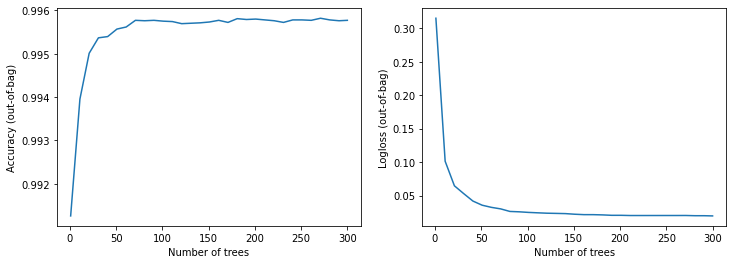

In [ ]:
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()